In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [2]:
path = 'https://stepik.org/media/attachments/lesson/396012/hw_aa.csv'

In [3]:
df = pd.read_csv(path, sep = ';')

In [4]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [5]:
df.version.unique()

array(['v2.8.0', 'v2.9.0', 'v3.7.4.0', 'v3.8.0.0'], dtype=object)

In [6]:
df.experimentVariant.unique()

array([1, 0])

In [7]:
df.version.value_counts()

v2.8.0      82835
v2.9.0      23954
v3.8.0.0    11804
v3.7.4.0     8425
Name: version, dtype: int64

In [8]:
df.experimentVariant.value_counts()

1    63916
0    63102
Name: experimentVariant, dtype: int64

In [9]:
df.purchase.unique()

array([0, 1])

In [10]:
df.dtypes

uid                  object
experimentVariant     int64
version              object
purchase              int64
dtype: object

In [11]:
df.head()

,uid,experimentVariant,version,purchase
0,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0


In [12]:
df_0 = df.query('experimentVariant == 0').purchase

In [13]:
df_1 = df.query('experimentVariant == 1').purchase

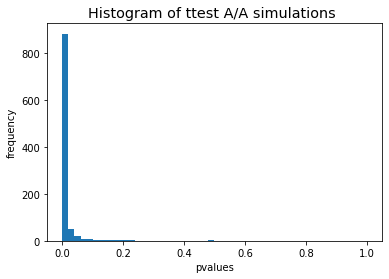

0.942

In [14]:
n = 100000
simulations = 1000
n_s = 1000
res = []


# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df_0.sample(n_s, replace = False).values
    s2 = df_1.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [15]:
#следовательно A/A-тест не сходится

In [16]:
# ищем, где проблема

df.groupby(['experimentVariant', 'version'], as_index=False) \
    .agg({'purchase' : 'mean'})

,experimentVariant,version,purchase
0,0,v2.8.0,0.000993
1,0,v2.9.0,0.074658
2,0,v3.7.4.0,0.059943
3,0,v3.8.0.0,0.057604
4,1,v2.8.0,0.045606
5,1,v2.9.0,0.071304
6,1,v3.7.4.0,0.063018
7,1,v3.8.0.0,0.062848


In [17]:
# мы видим, что есть отличия довольно большие в версии v2.8.0 в конверсии. Исключим пока их из нашего теста. 
# Еще под вопросом версия v3.8.0.0, но пока ее оставим.

In [18]:
df_0 = df.query('(experimentVariant == 0) & (version != "v2.8.0")').purchase

In [19]:
df_1 = df.query('(experimentVariant == 1) & (version != "v2.8.0")').purchase

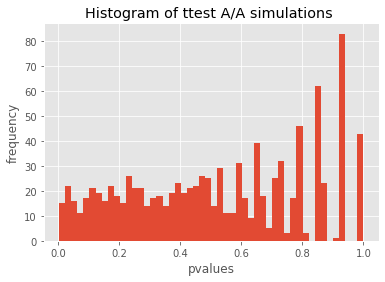

0.044

In [20]:
n = 100000
simulations = 1000
n_s = 1000
res = []


# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df_0.sample(n_s, replace = False).values
    s2 = df_1.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [21]:
#Теперь FPR < альфа

In [22]:
#можно еще посмотреть, сколько каждой версии в конкретной группе
df.groupby(['experimentVariant', 'version'], as_index=False) \
    .agg({'uid' : 'count'})

,experimentVariant,version,uid
0,0,v2.8.0,41283
1,0,v2.9.0,11921
2,0,v3.7.4.0,4204
3,0,v3.8.0.0,5694
4,1,v2.8.0,41552
5,1,v2.9.0,12033
6,1,v3.7.4.0,4221
7,1,v3.8.0.0,6110


In [23]:
# опять-таки более существенная разница в версии v3.8.0.0. Попробуем и ее исключить

In [24]:
df_0 = df.query('(experimentVariant == 0) & (version != "v2.8.0" ) & (version != "v3.8.0.0" )').purchase

In [25]:
df_1 = df.query('(experimentVariant == 1) & (version != "v2.8.0") & (version != "v3.8.0.0" )').purchase

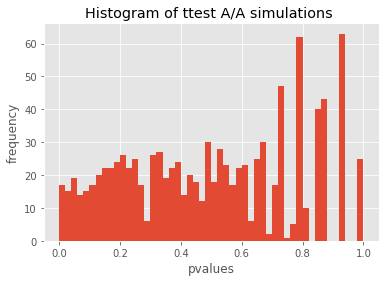

0.042

In [26]:
n = 100000
simulations = 1000
n_s = 1000
res = []


# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df_0.sample(n_s, replace = False).values
    s2 = df_1.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [ ]:
# получили чуть более лучшее значение

In [ ]:
# вывод: видимо на этапе деления на группы в нулевую группу попали пользователи из версии v2.8.0  
# с очень маленькой конверсией (0,1 %), в то время как в 1 группе у прользователей версии v2.8.0  конверсия 6%. 
# В этом кроется одна из причин не равенства групп.

# кроме того, есть заметные различия в рамерах версии в конкретной группе. 
# более существенная разница в версии v3.8.0.0. Исключая ее, получаем лучший результат. Соответсвенно, нужно 
# откорректировать количество пользователей этой версии для каждой группы.